In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("mugs-preference-parameters-full.csv")

In [3]:
df.head()

,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr
0,1,1,3,7,1,3,7,1,7,6,1,2,7,1,5,7,7,5,1,5,8,32,7,34,14
1,2,1,6,7,1,4,7,1,7,6,1,6,7,1,7,7,7,5,1,6,3,17,10,51,15
2,3,1,6,7,1,4,7,7,4,1,1,3,7,1,5,7,1,3,7,55,5,5,8,16,9
3,4,1,6,7,1,4,7,7,1,3,1,5,7,1,5,7,7,1,5,12,9,3,40,20,16
4,5,1,4,7,1,4,7,1,7,2,1,3,7,1,7,7,3,1,7,56,6,19,9,0,11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Cust    311 non-null    int64
 1   pPr30   311 non-null    int64
 2   pPr10   311 non-null    int64
 3   pPr05   311 non-null    int64
 4   pIn0.5  311 non-null    int64
 5   pIn1    311 non-null    int64
 6   pIn3    311 non-null    int64
 7   pCp12   311 non-null    int64
 8   pCp20   311 non-null    int64
 9   pCp32   311 non-null    int64
 10  pClD    311 non-null    int64
 11  pClF    311 non-null    int64
 12  pClE    311 non-null    int64
 13  pCnSl   311 non-null    int64
 14  pCnSp   311 non-null    int64
 15  pCnLk   311 non-null    int64
 16  pBrA    311 non-null    int64
 17  pBrB    311 non-null    int64
 18  pBrC    311 non-null    int64
 19  IPr     311 non-null    int64
 20  Iin     311 non-null    int64
 21  ICp     311 non-null    int64
 22  ICl     311 non-null    int64
 23  Icn     311 non

Price: $30, $10, $5
Time Insulated: 0.5 hrs, 1 hrs, 3 hrs
Capacity: 12 oz, 20 oz, 32 oz
Cleanability: Difficult (7 min), Fair (5 min), Easy (2 min)
Containment: Slosh resistant, Spill resistant, Leak resistant
Brand: A, B, C


In [45]:
## Multiplying Importance by preference level 



df['I*Pr30']= df['pPr30']*df['IPr']
df['I*Pr10']= df['pPr10']*df['IPr']
df['I*Pr5']= df['pPr05']*df['IPr']

df['I*pIn0.5']= df['pIn0.5']*df['Iin']
df['I*pIn1']= df['pIn1']*df['Iin']
df['I*pIn3']= df['pIn3']*df['Iin']

df['I*pCp12']= df['pCp12']*df['ICp']
df['I*pCp20']= df['pCp20']*df['ICp']
df['I*pCp32']= df['pCp32']*df['ICp']

df['I*pClD']= df['pClD']*df['ICl']
df['I*pClF']= df['pClF']*df['ICl']
df['I*pClE']= df['pClE']*df['ICl']

df['I*pCnSl']= df['pCnSl']*df['Icn']
df['I*pCnSp']= df['pCnSp']*df['Icn']
df['I*pCnLk']= df['pCnLk']*df['Icn']

df['I*pBrA']= df['pBrA']*df['IBr']
df['I*pBrB']= df['pBrB']*df['IBr']
df['I*pBrC']= df['pBrC']*df['IBr']



class_seg = df.iloc[:,19:]
class_seg = np.array(class_seg)

## K-means  
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
ave_within_cluster_mean_sum_of_squares = []
for k in range(2,11):
    random.seed(410014)
    kmeansModel = KMeans(n_clusters=k, n_init=50, max_iter=100)
    kmeansModel.fit(class_seg)
    ave_within_cluster_mean_sum_of_squares.append((kmeansModel.inertia_)/class_seg.shape[0])
    # alternatively you compute it manually as follows
    #ave_within_cluster_mean_sum_of_squares.append(sum(np.min(cdist(class_seg, kmeansModel.cluster_centers_, 'euclidean')**2, axis=1)) / class_seg.shape[0])
    

In [53]:
df.iloc[:,19:]

,IPr,Iin,ICp,ICl,Icn,IBr,I*Pr30,I*Pr10,I*Pr5,I*pIn0.5,I*pIn1,I*pIn3,I*pCp12,I*pCp20,I*pCp32,I*pClD,I*pClF,I*pClE,I*pCnSl,I*pCnSp,I*pCnLk,I*pBrA,I*pBrB,I*pBrC
0,5,8,32,7,34,14,5,15,35,8,24,56,32,224,192,7,14,49,34,170,238,98,70,14
1,6,3,17,10,51,15,6,36,42,3,12,21,17,119,102,10,60,70,51,357,357,105,75,15
2,55,5,5,8,16,9,55,330,385,5,20,35,35,20,5,8,24,56,16,80,112,9,27,63
3,12,9,3,40,20,16,12,72,84,9,36,63,21,3,9,40,200,280,20,100,140,112,16,80
4,56,6,19,9,0,11,56,224,392,6,24,42,19,133,38,9,27,63,0,0,0,33,11,77
5,9,6,0,57,13,15,9,45,63,6,24,42,0,0,0,57,228,399,13,78,91,45,15,105
6,39,12,11,7,19,12,39,273,273,12,72,84,11,77,77,7,21,49,19,38,133,36,84,12
7,33,13,12,25,8,10,33,198,231,13,26,91,12,84,24,25,150,175,8,24,56,50,70,10
8,14,16,17,9,31,13,14,70,98,16,48,112,17,85,119,9,54,63,31,186,217,91,52,13
9,40,10,10,10,15,15,40,280,280,10,30,70,60,70,10,10,50,70,15,60,105,45,105,15


In [ ]:
x = [k for k in range(2,11)]
plt.plot(x, ave_within_cluster_mean_sum_of_squares)

In [58]:
segmentClusters = pd.DataFrame(data = kmeansModel.cluster_centers_, columns= new_df.columns)
segmentClusters

,IPr,Iin,ICp,ICl,Icn,IBr,I*Pr30,I*Pr10,I*Pr5,I*pIn0.5,I*pIn1,I*pIn3,I*pCp12,I*pCp20,I*pCp32,I*pClD,I*pClF,I*pClE,I*pCnSl,I*pCnSp,I*pCnLk,I*pBrA,I*pBrB,I*pBrC
0,12.500000,8.214286,38.928571,11.714286,14.928571,13.571429,12.500000,69.142857,87.500000,8.214286,31.571429,57.500000,38.928571,224.928571,254.642857,11.714286,56.214286,82.000000,14.928571,63.357143,104.500000,88.571429,46.500000,29.571429
1,46.150943,9.566038,14.037736,8.679245,8.471698,13.094340,46.150943,251.905660,323.056604,9.566038,38.452830,66.962264,48.320755,81.075472,49.943396,8.679245,41.207547,60.754717,8.471698,31.584906,59.301887,37.679245,61.132075,56.301887
2,24.114286,17.142857,9.200000,22.171429,14.685714,12.685714,24.114286,122.742857,168.800000,17.142857,73.371429,120.000000,22.085714,50.142857,35.200000,22.171429,113.742857,155.200000,14.685714,42.771429,102.800000,39.228571,72.514286,39.971429
3,13.482759,11.103448,41.931034,10.862069,10.068966,12.551724,13.482759,73.103448,94.379310,11.103448,49.517241,77.724138,251.862069,253.275862,41.931034,10.862069,62.482759,76.034483,10.068966,44.000000,70.482759,70.482759,49.379310,29.482759
4,47.936170,6.680851,5.255319,20.000000,7.255319,12.893617,47.936170,260.531915,335.553191,6.680851,26.212766,46.765957,15.553191,23.085106,23.021277,20.000000,101.276596,140.000000,7.255319,25.702128,50.787234,25.021277,45.319149,85.191489
5,13.428571,8.250000,9.000000,8.285714,47.285714,13.785714,13.428571,72.392857,94.000000,8.250000,31.000000,57.750000,18.107143,50.928571,46.857143,8.285714,43.178571,58.000000,47.285714,210.535714,331.000000,79.785714,58.892857,28.964286
6,9.166667,43.500000,11.750000,8.166667,13.333333,13.916667,9.166667,42.250000,64.166667,43.500000,211.250000,304.500000,23.250000,62.000000,57.000000,8.166667,32.250000,57.166667,13.333333,53.833333,93.333333,97.416667,39.500000,25.833333
7,14.634146,8.902439,8.609756,44.512195,10.536585,12.804878,14.634146,78.268293,102.439024,8.902439,36.902439,62.317073,32.365854,47.975610,26.121951,44.512195,229.390244,311.585366,10.536585,42.536585,73.756098,49.878049,47.414634,55.707317
8,10.812500,10.687500,10.312500,23.125000,32.312500,13.062500,10.812500,53.937500,75.687500,10.687500,39.562500,74.812500,55.687500,51.625000,15.312500,23.125000,123.312500,161.875000,32.312500,154.812500,226.187500,85.187500,27.187500,43.937500
9,46.944444,6.638889,5.694444,7.083333,21.000000,12.555556,46.944444,260.805556,328.611111,6.638889,28.361111,46.472222,12.111111,27.638889,28.277778,7.083333,33.111111,49.583333,21.000000,91.694444,147.000000,36.305556,46.805556,64.722222


In [6]:
## Defining Data frame with Product Attributes

data = {'Product_1':[1,1,1,3,3,3,2,2,2,3,3,3,3,3,3,1,1,1], 'Product_2':[2,2,2,2,2,2]*3,'Product_3':[1,1,1,3,3,3,2,2,2,3,3,3,3,3,3,3,3,3]}
Product_Attributes = pd.DataFrame(data,columns = ['Product_1','Product_2','Product_3'])
Product_Attributes.index = ['Pr1','Pr2','Pr3','In1','In2','In3','Cp1','Cp2','Cp3','Cl1','Cl2','Cl3','Cn1','Cn2','Cn3','Br1','Br2','Br3']
Product_Attributes['Dummy'] = [1,2,3]*6

In [7]:
## Generating array of dummmies for Utility Scores. 

Utility_1 = []
for i in range(3):
        Utility_1.append((Product_Attributes.iloc[:,i].values==Product_Attributes['Dummy'].values).astype(int))

Utility_1 = np.reshape(Utility_1,(3,18)).transpose()
Utility_1 = pd.DataFrame(Utility_1,index=['Pr1','Pr2','Pr3','In1','In2','In3','Cp1','Cp2','Cp3','Cl1','Cl2','Cl3','Cn1','Cn2','Cn3','Br1','Br2','Br3'],columns = ['Product_1','Product_2','Product_3'])


In [62]:
## Generating cluster utility scores 

Utility_2 = np.dot(segmentClusters.iloc[:,6:],Utility_1)
Utility_2 = pd.DataFrame(Utility_2,index = [f'customer {i}' for i in range(1,11)],columns = ['Product_1','Product_2','Product_3'])
Utility_2

,Product_1,Product_2,Product_3
customer 1,570.000000,491.714286,511.000000
customer 2,351.924528,505.358491,370.547170
customer 3,491.485714,475.285714,492.228571
customer 4,561.482759,531.758621,520.482759
customer 5,333.595745,482.127660,393.765957
customer 6,590.892857,466.928571,540.071429
customer 7,623.583333,441.083333,552.000000
customer 8,560.146341,482.487805,565.975610
customer 9,610.500000,450.437500,569.250000
customer 10,353.944444,488.416667,382.361111


In [63]:
## Multiplying by c factor, exponentiation and sum
c = 0.0139

Utility_3= c*Utility_2
Utility_3 = np.exp(Utility_3)
Utility_3['Sum']= pd.DataFrame.sum(Utility_3,1)
Utility_3

,Product_1,Product_2,Product_3,Sum
customer 1,2760.038754,929.668965,1215.486880,4905.194600
customer 2,133.186572,1123.813418,172.535957,1429.535947
customer 3,926.719961,739.867731,936.338581,2602.926273
customer 4,2451.879972,1622.048000,1386.739164,5460.667136
customer 5,103.232203,813.685940,238.256258,1155.174401
customer 6,3690.106928,658.725655,1820.730107,6169.562689
customer 7,5812.745778,459.922655,2149.090482,8421.758914
customer 8,2406.753797,817.769480,2609.883793,5834.407070
customer 9,4846.199168,523.784977,2731.414812,8101.398956
customer 10,136.979020,888.017692,203.327798,1228.324511


In [10]:
Purchase_prob =[]
for i in range(3):
    Purchase_prob.append(Utility_3.iloc[:,i]/Utility_3['Sum'])

Purchase_prob = pd.DataFrame(np.reshape(Purchase_prob,(3,311)).transpose(),index = [f'customer {i}' for i in range(1,312)],columns = ['Product_1','Product_2','Product_3'])
Purchase_prob

,Product_1,Product_2,Product_3
customer 1,0.699133,0.083358,0.217509
customer 2,0.486828,0.373833,0.139339
customer 3,0.044053,0.862632,0.093316
customer 4,0.581555,0.045696,0.372749
customer 5,0.155383,0.558187,0.286430
customer 6,0.296904,0.019473,0.683624
customer 7,0.106018,0.818037,0.075945
customer 8,0.251632,0.604057,0.144311
customer 9,0.611031,0.182335,0.206634
customer 10,0.059895,0.900633,0.039472


In [11]:
marketshare = pd.DataFrame.mean(Purchase_prob)
marketshare
Margin = 30 - (1.0 + 2.6 + 3.0 + 1)
print(f'Market Share = {marketshare[2]*100:f}%')
print( f'Margin = ${Margin}')
print(f'Expected profit per person = ${marketshare[2]*Margin:f}')

Market Share = 25.884032%
Margin = $22.4
Expected profit per person = $5.798023


______

In [12]:
Lex = pd.DataFrame(columns = ['price','timeinsulated','capacity','cleanability','containment'])
Lex.name = 'Lex'
j = 0
for price in [i for i in [30,10,5]]:
    for timeinsulated in [str(i) + 'hrs' for i in [0.5,1,3]]:
        for capacity in [str(i) + 'oz' for i in [12,20,32]]:
            for cleanability in ['Difficult','Fair','Easy']:
                for containment in [i + ' resistant' for i in['Slosh','Spill','Leak']]:
                                    Lex.loc[j] = [price,timeinsulated,capacity,cleanability,containment]
                                    j += 1
Lex['brand']= 'C'
Lex

,price,timeinsulated,capacity,cleanability,containment,brand
0,30,0.5hrs,12oz,Difficult,Slosh resistant,C
1,30,0.5hrs,12oz,Difficult,Spill resistant,C
2,30,0.5hrs,12oz,Difficult,Leak resistant,C
3,30,0.5hrs,12oz,Fair,Slosh resistant,C
4,30,0.5hrs,12oz,Fair,Spill resistant,C
5,30,0.5hrs,12oz,Fair,Leak resistant,C
6,30,0.5hrs,12oz,Easy,Slosh resistant,C
7,30,0.5hrs,12oz,Easy,Spill resistant,C
8,30,0.5hrs,12oz,Easy,Leak resistant,C
9,30,0.5hrs,20oz,Difficult,Slosh resistant,C


In [13]:
## Finding Competitor Entries 
Product_A = Lex[(Lex['price'] == 30)
    & (Lex['timeinsulated'] == '3hrs') 
    & (Lex['capacity'] == '20oz')
    & (Lex['cleanability'] == 'Easy') 
    & (Lex['containment'] == 'Leak resistant')]
Product_B = Lex[(Lex['price'] == 10)
    & (Lex['timeinsulated'] == '1hrs') 
    & (Lex['capacity'] == '20oz')
    & (Lex['cleanability'] == 'Fair') 
    & (Lex['containment'] == 'Spill resistant')]

## Creating Dataframe for Competitors 
Competitors = pd.DataFrame()
Competitors.name = 'Competitors'
Competitors = Competitors.append([Product_A,Product_B])
Competitors['brand'] = ['A','B']
Competitors

,price,timeinsulated,capacity,cleanability,containment,brand
71,30,3hrs,20oz,Easy,Leak resistant,A
121,10,1hrs,20oz,Fair,Spill resistant,B


In [174]:
## Mapping Product Attributes to Values for Our Candidate 

Price = Lex['price'].map({30:1,10:2,5:3})
TimeInsulated = Lex['timeinsulated'].map({'0.5hrs':1,'1hrs':2,"3hrs":3})
Capacity = Lex['capacity'].map({'12oz':1,'20oz':2,"32oz":3})
Cleanability = Lex['cleanability'].map({'Difficult':1,'Fair':2,"Easy":3})
Containment = Lex['containment'].map({'Slosh resistant':1,'Spill resistant':2,"Leak resistant":3})
Brand =  Lex['brand'].map({'A':1,'B':2,'C':3})
Mapped = pd.concat([Price,TimeInsulated,Capacity,Cleanability,Containment,Brand], axis= 1)
Mapped = pd.DataFrame.transpose(Mapped)
EBA = Mapped.transpose()
Mapped = Mapped.apply(lambda row: row.repeat(3), axis=0)
Mapped.index = ['Pr1','Pr2','Pr3','In1','In2','In3','Cp1','Cp2','Cp3','Cl1','Cl2','Cl3','Cn1','Cn2','Cn3','Br1','Br2','Br3']        
Mapped['Dummy']= [1,2,3]*6
    
## Mapping Product Attributes to Values for Our Competitors   
    
Price = Competitors['price'].map({30:1,10:2,5:3})
TimeInsulated = Competitors['timeinsulated'].map({'0.5hrs':1,'1hrs':2,"3hrs":3})
Capacity = Competitors['capacity'].map({'12oz':1,'20oz':2,"32oz":3})
Cleanability = Competitors['cleanability'].map({'Difficult':1,'Fair':2,"Easy":3})
Containment = Competitors['containment'].map({'Slosh resistant':1,'Spill resistant':2,"Leak resistant":3})
Brand =  Competitors['brand'].map({'A':1,'B':2,"C":3})
Competitors_M = pd.concat([Price,TimeInsulated,Capacity,Cleanability,Containment,Brand], axis= 1)
Competitors_M = pd.DataFrame.transpose(Competitors_M)
Competitors_M = Competitors_M.apply(lambda row: row.repeat(3), axis=0)
Competitors_M.index = ['Pr1','Pr2','Pr3','In1','In2','In3','Cp1','Cp2','Cp3','Cl1','Cl2','Cl3','Cn1','Cn2','Cn3','Br1','Br2','Br3']
Competitors_M['Dummy']= [1,2,3]*6
Competitors_M

,71,121,Dummy
Pr1,1,2,1
Pr2,1,2,2
Pr3,1,2,3
In1,3,2,1
In2,3,2,2
In3,3,2,3
Cp1,2,2,1
Cp2,2,2,2
Cp3,2,2,3
Cl1,3,2,1


In [175]:
## Candidate 
Lex_Util_1 = []
for i in range(243):
    Lex_Util_1.append((Mapped.iloc[:,i].values==Mapped['Dummy'].values).astype(int))

Lex_Util_1 = np.reshape(Lex_Util_1,(243,18)).transpose()
Lex_Util_1 = pd.DataFrame(Lex_Util_1,index=['Pr1','Pr2','Pr3','In1','In2','In3','Cp1','Cp2','Cp3','Cl1','Cl2','Cl3','Cn1','Cn2','Cn3','Br1','Br2','Br3'],columns = [f'Product {i}'for i in range(243) ])
Lex_Util_1

Comp_Util_1 = []

## Competitors

for i in range(2):
    Comp_Util_1.append((Competitors_M.iloc[:,i].values==Competitors_M['Dummy'].values).astype(int))

Comp_Util_1 = np.reshape(Comp_Util_1,(2,18)).transpose()
Comp_Util_1 = pd.DataFrame(Comp_Util_1,index=['Pr1','Pr2','Pr3','In1','In2','In3','Cp1','Cp2','Cp3','Cl1','Cl2','Cl3','Cn1','Cn2','Cn3','Br1','Br2','Br3'],columns = [f'Product {i}'for i in range(2) ])

In [ ]:
## Candidate
Lex_Util_2 = np.dot(df.iloc[:,25:-1],Lex_Util_1)
Lex_Util_2 = pd.DataFrame(Lex_Util_2,index = [f'customer {i}' for i in range(1,312)],columns = [f'Product {i}'for i in range(243) ])


## Competitors
Comp_Util_2 = np.dot(df.iloc[:,25:-1],Comp_Util_1)
Comp_Util_2 = pd.DataFrame(Comp_Util_2,index = [f'customer {i}' for i in range(1,312)],columns = [f'Product {i}'for i in range(2) ])
Lex_Util_2['Product 44']

In [772]:
Comp_Util_2

,Product 0,Product 1
customer 1,670,517
customer 2,678,659
customer 3,287,501
customer 4,610,427
customer 5,327,419
...,...,...
customer 307,346,397
customer 308,659,471
customer 309,628,454
customer 310,291,369


In [166]:
c = 0.0139

## Candidate
Lex_Util_3= c*Lex_Util_2
Lex_Util_3 = np.exp(Lex_Util_3)
Lex_Util_3['Sum']= pd.DataFrame.sum(Lex_Util_3,1)

## Competitors
Comp_Util_3= c*Comp_Util_2
Comp_Util_3 = np.exp(Comp_Util_3)
Comp_Util_3['Sum']= pd.DataFrame.sum(Comp_Util_3,1)

Lex_Util_3[['Product 71','Product 121','Product 44',]]
Comp_Util_3['Product 44'] = Lex_Util_3['Product 44']


In [763]:
Lex_Util_1['Product 150']

Pr1    0
Pr2    1
Pr3    0
In1    0
In2    0
In3    1
Cp1    0
Cp2    1
Cp3    0
Cl1    0
Cl2    0
Cl3    1
Cn1    1
Cn2    0
Cn3    0
Br1    0
Br2    0
Br3    1
Name: Product 150, dtype: int64

In [156]:
## Calculating Market Share
Purchase_prob =[]
for i in range(243):
    x = Lex_Util_3.iloc[:,i] + Comp_Util_3.iloc[:,0] + Comp_Util_3.iloc[:,1]
    Purchase_prob.append((Lex_Util_3.iloc[:,i]/x))
Purchase_prob = np.reshape(Purchase_prob,(243,311))
Purchase_prob = pd.DataFrame(Purchase_prob.transpose(),index = [f'customer {i}' for i in range(1,312)],columns = [f'Product {i}'for i in range(243) ])
marketshare = pd.Series(Purchase_prob.mean())
Margin = 30 - (1.0 + 2.6 + 3.0 + 1)
print(f'Market Share = {marketshare[44]*100:f}%')

Market Share = 19.452611%


In [773]:
marketshare

Product 0      0.016530
Product 1      0.025234
Product 2      0.042167
Product 3      0.033560
Product 4      0.051275
                 ...   
Product 238    0.455497
Product 239    0.555399
Product 240    0.441466
Product 241    0.529777
Product 242    0.630500
Length: 243, dtype: float64

In [157]:
Costs = {'0.5hrs':0.5, '1hrs':1, '3hrs':3,'12oz':1.00, '20oz':2.6,  '32oz':2.8,'Difficult':1, 'Fair':2.2, 'Easy':3.0,'Slosh resistant':0.5, 'Spill resistant':0.8, 'Leak resistant':1}

In [757]:
j=0
for i in ['timeinsulated','capacity','cleanability','containment']:
    j += 1 
    Lex[f'{i} costs'] = Lex[i].map(Costs)

Lex['Total Cost' ] = pd.DataFrame.sum(Lex.iloc[:,5:10], axis = 1)
Lex['Margin'] = Lex['price'] - Lex['Total Cost']
Lex['Market Share (%)'] = pd.Series(np.transpose(marketshare).values)*100
Lex['Average profit per customer ($)']= Lex['Market Share (%)']*Lex['Margin']/100
Lex.to_csv('out.csv')

<AxesSubplot:xlabel='Market Share (%)', ylabel='Average profit per customer ($)'>

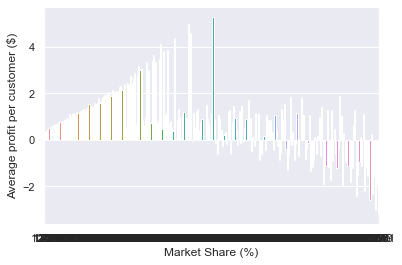

In [159]:
sns.set(font_scale=1)
sns.barplot(x = Lex['Market Share (%)'].round(3), y = Lex['Average profit per customer ($)'])

In [160]:
Lex.shape

(243, 14)

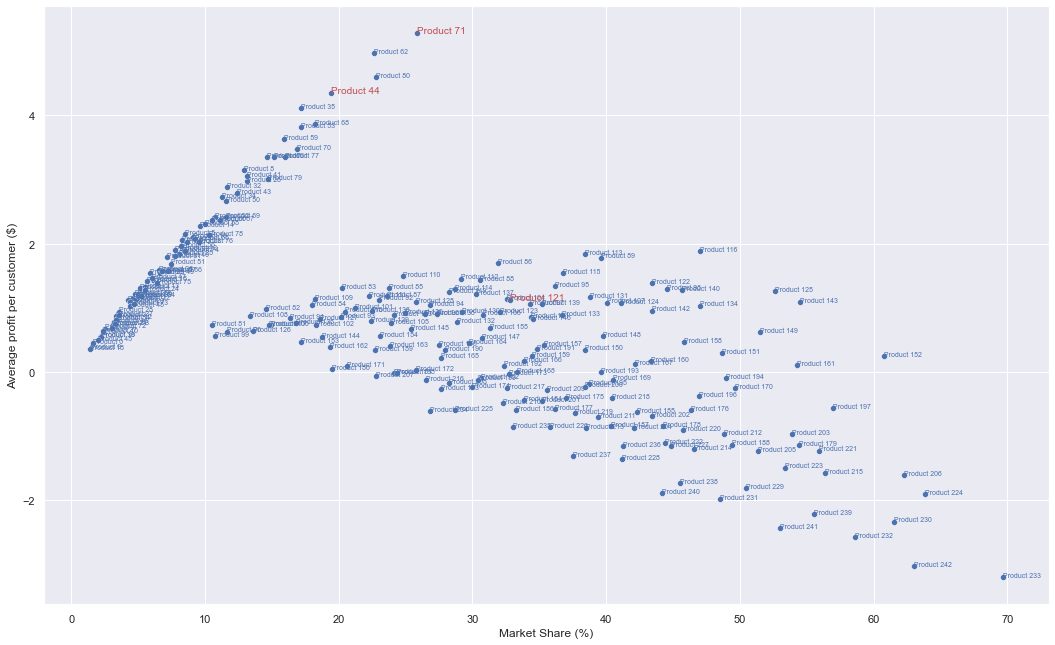

In [770]:
sns.scatterplot(x = Lex['Market Share (%)'], y = Lex['Average profit per customer ($)'])
sns.set(rc={'figure.figsize':(18,12)})
for i in range(Lex.shape[0]):
    if i == 44 or i == 71 or i == 121:
        plt.text(x= Lex['Market Share (%)'][i],y=Lex['Average profit per customer ($)'][i],s=f'Product {i}', 
              fontdict=dict(color='r',size=10))
    else: 
        plt.text(x= Lex['Market Share (%)'][i],y=Lex['Average profit per customer ($)'][i],s=f'Product {i}', 
              fontdict=dict(color='b',size=7))

In [162]:
### Candidate 71 is the best which also happens to be one of our competitors products
Lex[Lex['Average profit per customer ($)'] == Lex['Average profit per customer ($)'].max()]

,price,timeinsulated,capacity,cleanability,containment,brand,timeinsulated costs,capacity costs,cleanability costs,containment costs,Total Cost,Margin,Market Share (%),Average profit per customer ($)
71,30,3hrs,20oz,Easy,Leak resistant,C,3.0,2.6,3.0,1.0,9.6,20.4,25.884032,5.28034


_____

In [191]:
Preference

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC
0,1,3,7,1,3,7,1,7,6,1,2,7,1,5,7,7,5,1
1,1,6,7,1,4,7,1,7,6,1,6,7,1,7,7,7,5,1
2,1,6,7,1,4,7,7,4,1,1,3,7,1,5,7,1,3,7
3,1,6,7,1,4,7,7,1,3,1,5,7,1,5,7,7,1,5
4,1,4,7,1,4,7,1,7,2,1,3,7,1,7,7,3,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,3,7,1,6,7,1,7,6,1,7,7,1,5,7,4,1,7
307,1,3,7,1,6,7,1,7,6,1,6,7,1,2,7,7,1,4
308,1,6,7,1,5,7,1,7,3,1,2,7,1,3,7,7,3,1
309,1,3,7,1,5,7,1,7,1,1,4,7,1,4,7,1,5,7


In [163]:
#Importance = df.iloc[:,19:25]
Importance

,IPr,Iin,ICp,ICl,Icn,IBr,key
0,5,8,32,7,34,14,1
1,6,3,17,10,51,15,1
2,55,5,5,8,16,9,1
3,12,9,3,40,20,16,1
4,56,6,19,9,0,11,1
...,...,...,...,...,...,...,...
306,54,13,6,10,7,10,1
307,8,24,4,39,15,11,1
308,12,34,16,14,13,11,1
309,57,5,5,17,5,10,1


In [97]:
EBA = EBA.apply(lambda row: row.repeat(311), axis=0)

In [113]:
EBA['cutoff']= 2.5

In [180]:
Imp = Importance.iloc[0,:].sort_values(ascending = False).index

Preference = df.iloc[:,1:19]

In [186]:
Result = pd.DataFrame(np.dot(Preference,Lex_Util_1))

In [712]:
Preference

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC
0,1,3,7,1,3,7,1,7,6,1,2,7,1,5,7,7,5,1
1,1,6,7,1,4,7,1,7,6,1,6,7,1,7,7,7,5,1
2,1,6,7,1,4,7,7,4,1,1,3,7,1,5,7,1,3,7
3,1,6,7,1,4,7,7,1,3,1,5,7,1,5,7,7,1,5
4,1,4,7,1,4,7,1,7,2,1,3,7,1,7,7,3,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,3,7,1,6,7,1,7,6,1,7,7,1,5,7,4,1,7
307,1,3,7,1,6,7,1,7,6,1,6,7,1,2,7,7,1,4
308,1,6,7,1,5,7,1,7,3,1,2,7,1,3,7,7,3,1
309,1,3,7,1,5,7,1,7,1,1,4,7,1,4,7,1,5,7


In [720]:
if Dup == True:
    for i in range(100):
        y = Imp_values[np.random.randint(0,1)]
        
        if y == Imp_values[i]:
            continue
        else:
            Imp_values[i+1] = Imp_values[i]
            Imp_values[i] = y
        
        for j in Imp:  
            if new_df.empty: 
                break
            else:
                new_df = new_df[new_df[j]==True]

            products = pd.Series(new_df.index)

        if len(products) ==0:
            continue 
        else: 
            customer= pd.Series([f'customer {i}']*len(products))
            new = pd.concat([customer,products], axis = 1)
            new.columns = ['Customer','Product']
            #print(new)
            product_selection = pd.concat([new,product_selection], axis=0, ignore_index= True )
    x = product_selection['Product'].value_counts().mean()  
else: 
    for j in Imp:  
        if new_df.empty: 
            break
        else:
            new_df = new_df[new_df[j]==True]
            
        products = pd.Series(new_df.index)

    if len(products) ==0:
        continue 
    else: 
        customer= pd.Series([f'customer {i}']*len(products))
        new = pd.concat([customer,products], axis = 1)
        new.columns = ['Customer','Product']
        #print(new)
        product_selection = pd.concat([new,product_selection], axis=0, ignore_index= True )
    

Imp_values.shape
#Imp_values.values

(6, 1)

In [774]:
### EBA 
product_selection = pd.DataFrame(columns = ['Customer','Product'])

for i in range(311):
    customer_1 = np.reshape(Preference.iloc[i,:].values,(18,1)).transpose()
    customer_1 = pd.DataFrame(customer_1)
    customer_1 = customer_1.apply(lambda row: row.repeat(243), axis=0)
    customer_1 = pd.DataFrame(customer_1.transpose().values,index=['Pr1','Pr2','Pr3','In1','In2','In3','Cp1','Cp2','Cp3','Cl1','Cl2','Cl3','Cn1','Cn2','Cn3','Br1','Br2','Br3'],columns = [f'Product {i}'for i in range(243) ])

    
    new_df = pd.DataFrame(customer_1*Lex_Util_1).transpose()
    new_df['price'] = new_df['Pr1'] + new_df['Pr2'] + new_df['Pr3']
    new_df['timeinsulated'] = new_df['In1'] + new_df['Pr2'] + new_df['Pr3']
    new_df['capacity'] = new_df['Cp1'] + new_df['Cp2'] + new_df['In3']
    new_df['cleanability'] = new_df['Cl1'] + new_df['Cl2'] + new_df['Cl3']
    new_df['containment'] = new_df['Cn1'] + new_df['Cn2'] + new_df['Cn3']
    new_df['brand'] = new_df['Br1'] + new_df['Br2'] + new_df['Br3']
    new_df['cutoff']=2.5
    new_df = new_df.iloc[:,-7:]
    new_df = new_df.apply(lambda x: x>new_df['cutoff'])
    
        
    Imp = pd.DataFrame(Importance.iloc[:,i])
    Imp_values = Imp
    Imp.index = ['price','timeinsulated','capacity','cleanability','containment','brand']
    Imp.sort_values(by = i, ascending = False, inplace = True)
    Imp = np.array(Imp.index)
    Dup = ((Imp_values.value_counts()>1).any == True)
    
    for j in Imp:  
        if new_df.empty: 
            break
        else:
            new_df = new_df[new_df[j]==True]
#             print(j)
        products = pd.Series(new_df.index)
    
    if len(products) ==0:
        continue 
    else: 
        customer= pd.Series([f'customer {i}']*len(products))
        new = pd.concat([customer,products], axis = 1)
        new.columns = ['Customer','Product']
        #print(new)
        product_selection = pd.concat([new,product_selection], axis=0, ignore_index= True )
        #product_selection.append(['Customer 1', 'Product 45'])
    
print(product_selection)    
    

          Customer      Product
0     customer 310   Product 95
1     customer 310   Product 98
2     customer 310  Product 122
3     customer 310  Product 125
4     customer 310  Product 140
...            ...          ...
7877    customer 2  Product 233
7878    customer 2  Product 238
7879    customer 2  Product 239
7880    customer 2  Product 241
7881    customer 2  Product 242

[7882 rows x 2 columns]


In [775]:
x = product_selection['Product'].value_counts()
x

Product 224    208
Product 242    208
Product 233    208
Product 143    200
Product 152    200
Product 161    200
Product 221    199
Product 239    199
Product 230    199
Product 158    191
Product 149    191
Product 140    191
Product 206    171
Product 179    171
Product 125    165
Product 98     165
Product 176    163
Product 203    163
Product 223    161
Product 241    161
Product 232    161
Product 95     157
Product 122    157
Product 151    155
Product 160    155
Product 142    155
Product 229    153
Product 238    153
Product 220    153
Product 139    147
Product 148    147
Product 157    147
Product 178    133
Product 205    133
Product 97     129
Product 124    129
Product 175    126
Product 202    126
Product 121    122
Product 94     122
Product 170     92
Product 197     92
Product 194     90
Product 167     90
Product 89      88
Product 116     88
Product 113     86
Product 86      86
Product 196     77
Product 169     77
Product 193     76
Product 166     76
Product 115 

In [704]:
# product_selection = pd.DataFrame(data = [['Customer 1', 'Product 45']], columns = ['Customer','Product'])
# product_selection
df3 = pd.DataFrame(data = [['Customer 12', 'Product 45']])
new = pd.DataFrame([['Customer 12', 'Product 46']])
new_df = pd.concat([df3,new], axis = 0, ignore_index= True)

In [482]:
customer_1 = np.reshape(Preference.iloc[47,:].values,(18,1)).transpose()
customer_1 = pd.DataFrame(customer_1)
customer_1 = customer_1.apply(lambda row: row.repeat(243), axis=0)
customer_1 = pd.DataFrame(customer_1.transpose().values,index=['Pr1','Pr2','Pr3','In1','In2','In3','Cp1','Cp2','Cp3','Cl1','Cl2','Cl3','Cn1','Cn2','Cn3','Br1','Br2','Br3'],columns = [f'Product {i}'for i in range(243) ])
customer_1.transpose()

,Pr1,Pr2,Pr3,In1,In2,In3,Cp1,Cp2,Cp3,Cl1,Cl2,Cl3,Cn1,Cn2,Cn3,Br1,Br2,Br3
Product 0,1,6,7,1,4,7,6,7,1,1,6,7,1,5,7,7,1,4
Product 1,1,6,7,1,4,7,6,7,1,1,6,7,1,5,7,7,1,4
Product 2,1,6,7,1,4,7,6,7,1,1,6,7,1,5,7,7,1,4
Product 3,1,6,7,1,4,7,6,7,1,1,6,7,1,5,7,7,1,4
Product 4,1,6,7,1,4,7,6,7,1,1,6,7,1,5,7,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Product 238,1,6,7,1,4,7,6,7,1,1,6,7,1,5,7,7,1,4
Product 239,1,6,7,1,4,7,6,7,1,1,6,7,1,5,7,7,1,4
Product 240,1,6,7,1,4,7,6,7,1,1,6,7,1,5,7,7,1,4
Product 241,1,6,7,1,4,7,6,7,1,1,6,7,1,5,7,7,1,4


In [514]:
Imp = pd.DataFrame(Importance.iloc[:,47])
Imp.index = ['price','timeinsulated','capacity','cleanability','containment','brand']
Imp.sort_values(by = 47, ascending = False, inplace = True)
Imp = np.array(Imp.index)
Imp

array(['cleanability', 'capacity', 'containment', 'brand', 'price',
       'timeinsulated'], dtype=object)

In [556]:
new_df = pd.DataFrame(customer_1*Lex_Util_1).transpose()

new_df['price'] = new_df['Pr1'] + new_df['Pr2'] + new_df['Pr3']
new_df['timeinsulated'] = new_df['In1'] + new_df['Pr2'] + new_df['Pr3']
new_df['capacity'] = new_df['Cp1'] + new_df['Cp2'] + new_df['In3']
new_df['cleanability'] = new_df['Cl1'] + new_df['Cl2'] + new_df['Cl3']
new_df['containment'] = new_df['Cn1'] + new_df['Cn2'] + new_df['Cn3']
new_df['brand'] = new_df['Br1'] + new_df['Br2'] + new_df['Br3']
new_df['cutoff']=2.5
new_df = new_df.iloc[:,-7:]

In [557]:
new_df

,price,timeinsulated,capacity,cleanability,containment,brand,cutoff
Product 0,1,1,6,1,1,4,2.5
Product 1,1,1,6,1,5,4,2.5
Product 2,1,1,6,1,7,4,2.5
Product 3,1,1,6,6,1,4,2.5
Product 4,1,1,6,6,5,4,2.5
...,...,...,...,...,...,...,...
Product 238,7,7,7,6,5,4,2.5
Product 239,7,7,7,6,7,4,2.5
Product 240,7,7,7,7,1,4,2.5
Product 241,7,7,7,7,5,4,2.5


In [558]:
new_df = new_df.apply(lambda x: x>new_df['cutoff'])
for i in Imp:  
        new_df = new_df[new_df[i]==True]
        print(i)
        print(new_df)
        

cleanability
             price  timeinsulated  capacity  cleanability  containment  brand  \
Product 3    False          False      True          True        False   True   
Product 4    False          False      True          True         True   True   
Product 5    False          False      True          True         True   True   
Product 6    False          False      True          True        False   True   
Product 7    False          False      True          True         True   True   
...            ...            ...       ...           ...          ...    ...   
Product 238   True           True      True          True         True   True   
Product 239   True           True      True          True         True   True   
Product 240   True           True      True          True        False   True   
Product 241   True           True      True          True         True   True   
Product 242   True           True      True          True         True   True   

             c